## MNIST Dataset

In [1]:
from qml_ssl.data import create_data_loader, load_mnist_img
from qml_ssl.models.img_classical import Conv_UnSupContrastive, LinearProbe
from qml_ssl.models.mods import get_mnist_augmentations
from qml_ssl.utils.plotting import generate_embeddings, vmf_kde_on_circle, pca_proj, tsne_proj, plot_training
from qml_ssl.utils.training import get_trainer

import warnings

# Ignore all UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

### 1. SSL for Binary Classification

In [2]:
classes = (0, 1)
reduced_dim = 16

mnist_data = load_mnist_img(classes=classes, reduced_dim = reduced_dim)

train_loader = create_data_loader(mnist_data["train_data"], mnist_data["train_labels"])
val_loader = create_data_loader(mnist_data["test_data"], mnist_data["test_labels"], shuffle=False)

Train dataset size: 12665
Test dataset size: 2115


Embeddings before Training


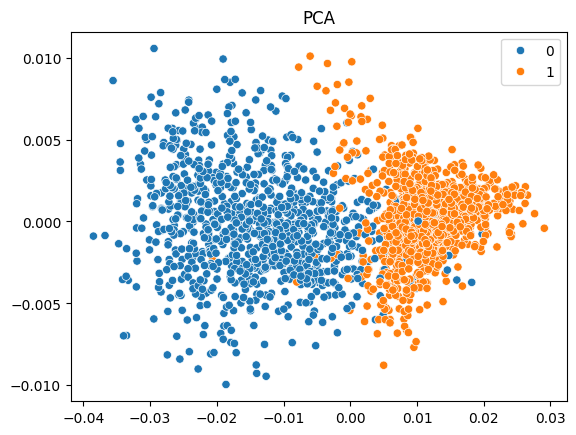

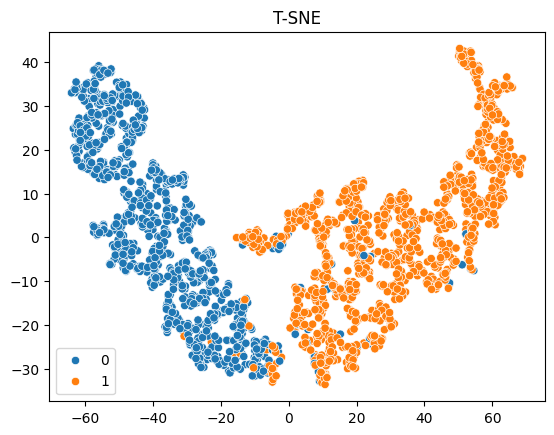

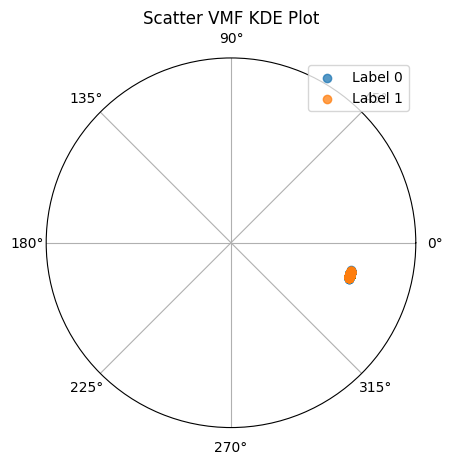

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/conv_unsupcontrast_mnist_01/version_5


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/2650068ff8424dcd89d599c25ef926f7

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                   | Type              | Params | Mode
---------------------------------------------------------------------
0  | encoder                | ConvEncoder       | 696    | eval
1  | encoder.layers         | ModuleList        | 696    | eval
2  | encoder.layers.0       | ConvUnit          | 96     | eval
3  | encoder.layers.0.conv  | Conv2d            | 80     | eval
4  | encoder.layers.0.bn    | BatchNorm2d       | 16     | eval
5  | encoder.layers.0.activ | ReLU              | 0      | eval
6  | encoder.layers.0.pool  | MaxPool2d         | 0      | eval
7  | encoder.layers.1       | ConvUnit          | 600    | eval
8  | encoder.layers.1.conv  | Conv2d            | 584    | eval
9  | encoder.layers.1.bn    | BatchNorm2d       | 16     | eval
10 | encoder.layers.1.activ | ReL

Epoch 19: 100%|██████████| 198/198 [00:06<00:00, 28.33it/s, v_num=26f7, train_loss=3.750]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 198/198 [00:07<00:00, 28.09it/s, v_num=26f7, train_loss=3.750]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : conv_unsupcontrast_mnist_01
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/2650068ff8424dcd89d599c25ef926f7
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_loss [20] : (3.751995801925659, 4.104700565338135)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : conv_unsupcontrast_mnist_01
COMET INFO:   Parameters:
COMET INFO:     activ_type              : relu
COMET INFO:     augmentations           : Compose(
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    RandomAffine(degrees=[0.0

Embeddings after Training


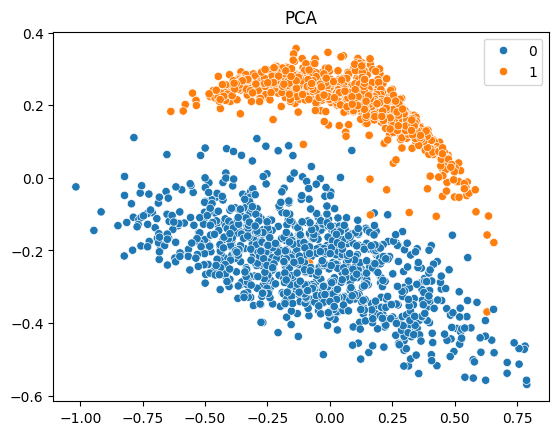

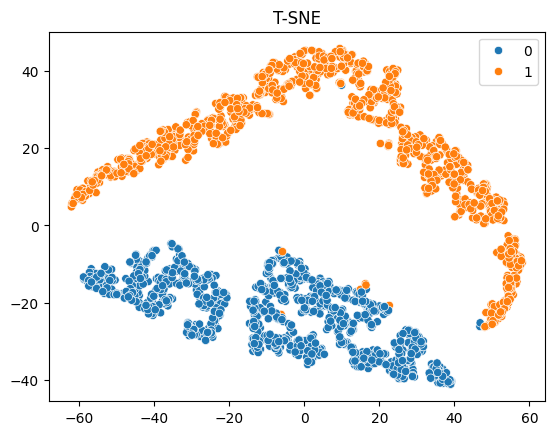

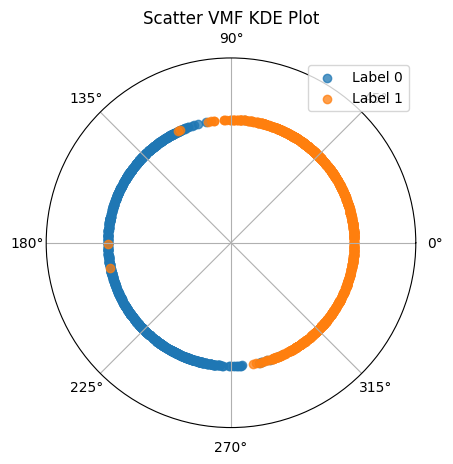

In [3]:
model = Conv_UnSupContrastive(proj_dim=2, lr=1e-3, loss="NTXentLoss", loss_kwargs={"temperature": 0.5}, augmentations=get_mnist_augmentations())

print("Embeddings before Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

# Training the model
trainer, log_dir = get_trainer("conv_unsupcontrast_mnist_01", monitor_metric="train_loss")
trainer.fit(model, train_loader, val_loader)

print("Embeddings after Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

# plot_training(log_dir)

In [5]:
linear_probe = LinearProbe(pretrained_model=model, classes=classes, num_layers=2, hidden_dim=8)

trainer, log_dir = get_trainer("probing_unsupcontrast_mnist_01", monitor_metric="valid_loss", max_epochs=20)
trainer.fit(linear_probe, train_loader, val_loader)

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/probing_unsupcontrast_mnist_01/version_3


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/6742a65101c042f3b5de95bb59e4c5b4

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                                    | Type                  | Params | Mode 
-------------------------------------------------------------------------------------------
0  | pretrained_model                        | Conv_UnSupContrastive | 714    | eval 
1  | pretrained_model.encoder                | ConvEncoder           | 696    | eval 
2  | pretrained_model.encoder.layers         | ModuleList            | 696    | eval 
3  | pretrained_model.encoder.layers.0       | ConvUnit              | 96     | eval 
4  | pretrained_model.encoder.layers.0.conv  | Conv2d                | 80     | eval 
5  | pretrained_model.encoder.layers.0.bn    | BatchNorm2d           | 16     | eval 
6  | pretrained_model.encoder.layers.0.activ | ReLU                  | 0      | eval 
7  | pretrained_model.encod

Epoch 19: 100%|██████████| 198/198 [00:03<00:00, 58.83it/s, v_num=c5b4, valid_loss=0.0267, valid_acc=0.994, train_loss=0.0378, train_acc=0.989]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 198/198 [00:03<00:00, 58.56it/s, v_num=c5b4, valid_loss=0.0267, valid_acc=0.994, train_loss=0.0378, train_acc=0.989]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : probing_unsupcontrast_mnist_01
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/6742a65101c042f3b5de95bb59e4c5b4
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_acc [20]  : (0.9683379530906677, 0.9891827702522278)
COMET INFO:     train_loss [20] : (0.03784002363681793, 0.6000494360923767)
COMET INFO:     valid_acc [20]  : (0.9834515452384949, 0.9943262338638306)
COMET INFO:     valid_loss [20] : (0.026676056906580925, 0.5292770266532898)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : probing_unsupcontrast_mnist_01
COME

### 2. SSL for Multiclass Classification

In [6]:
classes = list(range(10))
reduced_dim = 16

mnist_data = load_mnist_img(classes=classes, reduced_dim = reduced_dim)

train_loader = create_data_loader(mnist_data["train_data"], mnist_data["train_labels"])
val_loader = create_data_loader(mnist_data["test_data"], mnist_data["test_labels"], shuffle=False)

Train dataset size: 60000
Test dataset size: 10000


Embeddings before Training


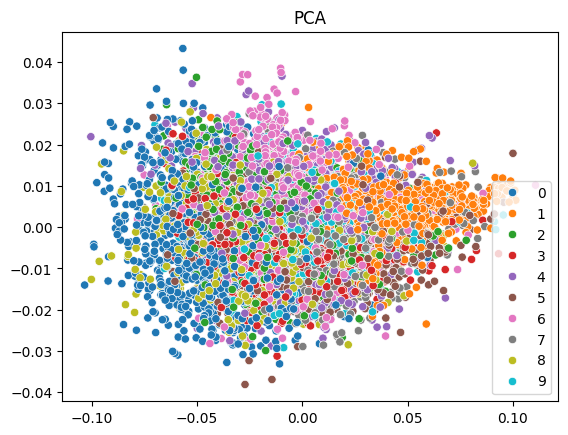

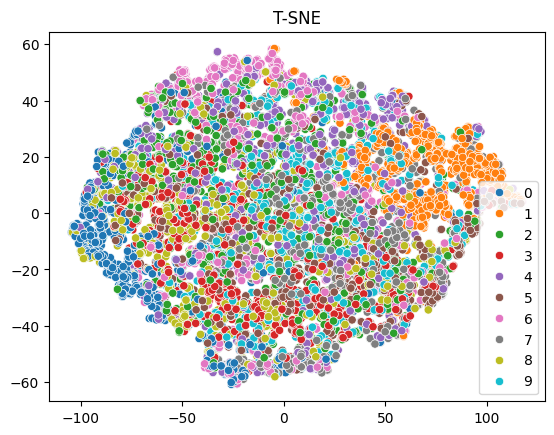

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/conv_unsupcontrast_mnist_all/version_1


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/3f6cafdcb8794b63b118cde9656ebb0d

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                   | Type              | Params | Mode
---------------------------------------------------------------------
0  | encoder                | ConvEncoder       | 696    | eval
1  | encoder.layers         | ModuleList        | 696    | eval
2  | encoder.layers.0       | ConvUnit          | 96     | eval
3  | encoder.layers.0.conv  | Conv2d            | 80     | eval
4  | encoder.layers.0.bn    | BatchNorm2d       | 16     | eval
5  | encoder.layers.0.activ | ReLU              | 0      | eval
6  | encoder.layers.0.pool  | MaxPool2d         | 0      | eval
7  | encoder.layers.1       | ConvUnit          | 600    | eval
8  | encoder.layers.1.conv  | Conv2d            | 584    | eval
9  | encoder.layers.1.bn    | BatchNorm2d       | 16     | eval
10 | encoder.layers.1.activ | ReL

Epoch 19: 100%|██████████| 938/938 [00:29<00:00, 32.11it/s, v_num=bb0d, train_loss=1.250]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 938/938 [00:29<00:00, 32.05it/s, v_num=bb0d, train_loss=1.250]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : conv_unsupcontrast_mnist_all
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/3f6cafdcb8794b63b118cde9656ebb0d
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_loss [20] : (1.2011668682098389, 2.2725062370300293)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : conv_unsupcontrast_mnist_all
COMET INFO:   Parameters:
COMET INFO:     activ_type              : relu
COMET INFO:     augmentations           : Compose(
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    RandomAffine(degrees=

Embeddings after Training


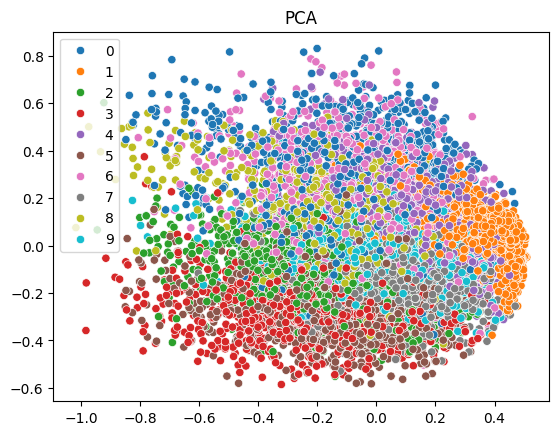

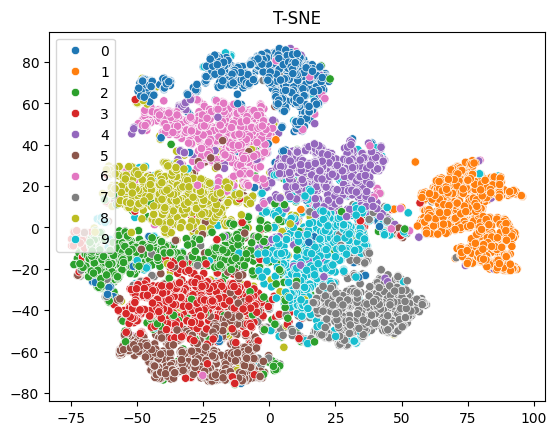

In [7]:
model = Conv_UnSupContrastive(proj_dim=16, lr=1e-3, loss="NTXentLoss", loss_kwargs={"temperature": 0.07}, augmentations=get_mnist_augmentations())

print("Embeddings before Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

# Training the model
trainer, log_dir = get_trainer("conv_unsupcontrast_mnist_all", monitor_metric="train_loss")
trainer.fit(model, train_loader, val_loader)

print("Embeddings after Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
# vmf_kde_on_circle(embeddings, labels)

# plot_training(log_dir)

In [8]:
linear_probe = LinearProbe(pretrained_model=model, classes=classes, num_layers=2, hidden_dim=16)

trainer, log_dir = get_trainer("probing_unsupcontrast_mnist_all", monitor_metric="valid_loss", max_epochs=20)
trainer.fit(linear_probe, train_loader, val_loader)

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/probing_unsupcontrast_mnist_all/version_1


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/255f7bfda9f448669731da39c93a8d15

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                                    | Type                  | Params | Mode 
-------------------------------------------------------------------------------------------
0  | pretrained_model                        | Conv_UnSupContrastive | 840    | eval 
1  | pretrained_model.encoder                | ConvEncoder           | 696    | eval 
2  | pretrained_model.encoder.layers         | ModuleList            | 696    | eval 
3  | pretrained_model.encoder.layers.0       | ConvUnit              | 96     | eval 
4  | pretrained_model.encoder.layers.0.conv  | Conv2d                | 80     | eval 
5  | pretrained_model.encoder.layers.0.bn    | BatchNorm2d           | 16     | eval 
6  | pretrained_model.encoder.layers.0.activ | ReLU                  | 0      | eval 
7  | pretrained_model.encod

Epoch 19: 100%|██████████| 938/938 [00:14<00:00, 64.88it/s, v_num=8d15, valid_loss=0.406, valid_acc=0.865, train_loss=0.430, train_acc=0.861]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 938/938 [00:14<00:00, 64.85it/s, v_num=8d15, valid_loss=0.406, valid_acc=0.865, train_loss=0.430, train_acc=0.861]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : probing_unsupcontrast_mnist_all
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/255f7bfda9f448669731da39c93a8d15
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_acc [20]  : (0.6139833331108093, 0.8611166477203369)
COMET INFO:     train_loss [20] : (0.4298902451992035, 1.437844157218933)
COMET INFO:     valid_acc [20]  : (0.8208000063896179, 0.866599977016449)
COMET INFO:     valid_loss [20] : (0.40527409315109253, 0.7197238802909851)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : probing_unsupcontrast_mnist_all
COMET 